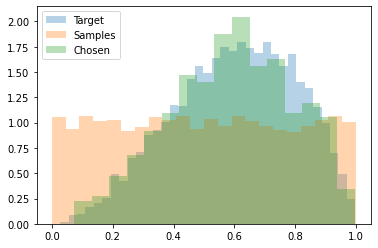

0.599824350412499 0.5900272710156639


In [1]:
import numpy as np
import matplotlib.pyplot as plt


target_data = (np.random.beta(3, 2, 10000)).tolist()
samples_data = (np.random.beta(1, 1, 10000))
samples_data_original = samples_data.copy()

remaining_indices = np.arange(len(samples_data))
chosen_indicies = []

# Bin the target data
hist, bin_edges = np.histogram(target_data, bins="fd")

# Append and prepend a 0
hist_modified_zeros = np.zeros(len(hist) + 2)
hist_modified_zeros[1:-1] =  hist

hist_modified_ones = np.ones(len(hist) + 2)
hist_modified_ones[1:-1] =  hist

chosen_data = []
for counter in range(1000):
    
    # Map the samples to the bins
    # If 0 is returned, the sample is to the left of the leftmost bin
    # If len(bins) is returned, the sample is to the right of the rightmost bin
    target_bin_idx = np.digitize(samples_data[remaining_indices], bins=bin_edges, right=False) # bins[i-1] <= x < bins[i]'

    # Get weights
    weights = hist_modified_zeros[target_bin_idx]
    
    if np.sum(weights) == 0:
        weights = hist_modified_ones[target_bin_idx]

    assert np.sum(weights) > 0

    weights = weights / np.sum(weights)

    chosen_index = np.random.choice(a=remaining_indices, p=weights, size=1)[0]
    remaining_indices = remaining_indices[remaining_indices != chosen_index]
    chosen_indicies.append(chosen_index)



chosen_data = [samples_data_original[i] for i in chosen_indicies]


plt.hist(target_data, bins="fd", label="Target", alpha=0.33, density=True)
plt.hist(samples_data_original, bins="fd", label="Samples", alpha=0.33, density=True)
plt.hist(chosen_data, bins="fd", label="Chosen", alpha=0.33, density=True)

plt.legend()
plt.show()




print(np.mean(target_data), np.mean(chosen_data))

In [3]:
target_bin_idx

array([11, 20,  0, ..., 34,  5, 10], dtype=int64)

In [2]:
1/0

ZeroDivisionError: division by zero

In [ ]:
from scipy.stats import kstest



results = kstest(chosen_data, target_data, alternative='two-sided')
print("probability that they are identical", results.pvalue)

In [ ]:
target_data

In [ ]:
# Bin the target data
hist, bin_edges = np.histogram(target_data, bins="fd")
hist, bin_edges

In [ ]:
samples_data

In [ ]:
# If 0 is returned, the sample is to the left of the leftmost bin
# If len(bins) is returned, the sample is to the right of the rightmost bin
target_bin_idx = np.digitize(samples_data, bins=bin_edges, right=False) # bins[i-1] <= x < bins[i]'
target_bin_idx

hist_modified = np.array([0] + list(hist) + [0])
weights = hist_modified[target_bin_idx]

assert np.sum(weights) > 0


In [ ]:
hist

In [ ]:
hist[target_bin_idx-1]

In [ ]:
weights = hist[target_bin_idx-2]


weights_trimmed = weights.copy()
# Samples larger than the largest bin in the target have weights set to zero
weights_trimmed[samples_data >  bin_edges[-1]] = 0
weights_trimmed[samples_data < bin_edges[0]] = 0

# If trimmed weight can be used, use them
if np.sum(weights_trimmed) > 0:
    weights = weights_trimmed
    
weights = weights / np.sum(weights)

chosen_point = np.random.choice(a=samples_data, p=weights, size=1)[0]

In [ ]:
plt.plot(weights)

In [ ]:
bins = np.histogram_bin_edges(target_data, bins="fd")

# hist => count of values in each interval
# bin_edges => egdes of each interval
hist, bin_edges = np.histogram(target_data, bins=bins)

hist, bin_edges

In [ ]:
np.digitize(target_data, bins=bins)

In [ ]:
from numpy.linalg import cholesky
import numpy as np

n = 3

y = np.arange(n) + 1
F = np.random.random(size=(n, n))
K = F.T @ F



y, K

In [ ]:
preds1 = y[1:] @ np.linalg.solve(K[1:, 1:], K[1:, 0])

preds1

In [ ]:
K_inv = np.linalg.inv(K)

-(K_inv[0, 1:]/ K_inv[0, 0]) @ y[1:]

In [ ]:
e = np.ones(n, dtype=bool)
e[1] = 0

preds1 = (y[e]) @ np.linalg.solve(K[e,:][:, e], K[e, 1])

preds1

In [ ]:
K_inv = np.linalg.inv(K)

-(K_inv[1, e]/ K_inv[1, 1]) @ y[e]